# Importing the important libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import statsmodels.api as sm
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Reading in the Data

In [120]:
# Read in data using python pandas
df = pd.read_csv('dynamic_features.csv')
print(df.shape)
df.head()


(36434, 262)


,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,...,pcm_fftMag_mfcc_sma_de[5]_std,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std
0,1,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,...,3.360937,4.275177,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544
1,1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,...,4.089718,3.798621,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661
2,1,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,...,4.712993,3.006370,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483
3,1,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,...,3.900845,2.623482,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041
4,1,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,...,1.913931,2.096191,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982


# Overview Info of Data

In [121]:
# A little information about the data
df.info

<bound method DataFrame.info of        musicId  frameTime  F0final_sma_mean  voicingFinalUnclipped_sma_mean  \
0            1        1.0         76.236881                        0.638026   
1            1        1.5         71.114166                        0.651490   
2            1        2.0         72.168291                        0.638354   
3            1        2.5        106.613114                        0.665557   
4            1        3.0         87.619460                        0.678091   
...        ...        ...               ...                             ...   
36429      624        1.5        115.310220                        0.768102   
36430      624        2.0        102.391508                        0.777736   
36431      624        2.5         60.120377                        0.768029   
36432      624        3.0         90.506923                        0.740515   
36433      624        3.5        130.481778                        0.732177   

       jitterLocal_

# Duplicate Data

In [122]:
# Duplicating our data so as not to tamper with our original data in case something does goes wrong
dfe = df.copy()

In [123]:
# Drop null values from the data. that is cells with no data points
dfe = dfe.dropna()
dfe.isnull().sum()

musicId                           0
frameTime                         0
F0final_sma_mean                  0
voicingFinalUnclipped_sma_mean    0
jitterLocal_sma_mean              0
                                 ..
pcm_fftMag_mfcc_sma_de[10]_std    0
pcm_fftMag_mfcc_sma_de[11]_std    0
pcm_fftMag_mfcc_sma_de[12]_std    0
pcm_fftMag_mfcc_sma_de[13]_std    0
pcm_fftMag_mfcc_sma_de[14]_std    0
Length: 262, dtype: int64

# Statistical Summary of the data

In [124]:
dfe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
musicId,36434.0,315.349866,184.228383,1.000000,147.000000,323.000000,480.000000,624.000000
frameTime,36434.0,21.179777,14.480787,1.000000,9.500000,19.000000,30.000000,85.000000
F0final_sma_mean,36434.0,113.635477,77.542918,0.000000,61.560121,91.050730,148.285399,556.793016
voicingFinalUnclipped_sma_mean,36434.0,0.726280,0.080184,0.000000,0.712212,0.739575,0.764950,0.959275
jitterLocal_sma_mean,36434.0,0.056431,0.035780,0.000000,0.029477,0.051211,0.077389,0.266294
...,...,...,...,...,...,...,...,...
pcm_fftMag_mfcc_sma_de[10]_std,36434.0,2.402110,0.537913,0.541700,2.027242,2.329052,2.703392,6.295761
pcm_fftMag_mfcc_sma_de[11]_std,36434.0,2.342562,0.513804,0.564994,1.981677,2.276790,2.630647,6.006817
pcm_fftMag_mfcc_sma_de[12]_std,36434.0,2.226553,0.491726,0.485912,1.881653,2.161167,2.509854,5.028401
pcm_fftMag_mfcc_sma_de[13]_std,36434.0,2.080104,0.471612,0.501418,1.748834,2.020129,2.352093,5.021756


In [125]:
print(" Dimension of The Sample Size ")
print(" ")
print(dfe.shape)

print(" ")
print(" ===================== Statistical Summary of the data ========================= ")
print(" ")
#shows the statistical summary of the data
summary = dfe.describe()
print(summary)

 Dimension of The Sample Size 
 
(36434, 262)
 
 ===================== Statistical Summary of the data ========================= 
 
            musicId     frameTime  F0final_sma_mean  \
count  36434.000000  36434.000000      36434.000000   
mean     315.349866     21.179777        113.635477   
std      184.228383     14.480787         77.542918   
min        1.000000      1.000000          0.000000   
25%      147.000000      9.500000         61.560121   
50%      323.000000     19.000000         91.050730   
75%      480.000000     30.000000        148.285399   
max      624.000000     85.000000        556.793016   

       voicingFinalUnclipped_sma_mean  jitterLocal_sma_mean  \
count                    36434.000000          36434.000000   
mean                         0.726280              0.056431   
std                          0.080184              0.035780   
min                          0.000000              0.000000   
25%                          0.712212              0.0294

# Reading in Annotations

In [126]:
df_target = pd.read_csv('dynamic_annotations_std.csv')
df_target.dropna()
print(df_target.info)
df_target.head()

<bound method DataFrame.info of        musicId  frameTime  Arousal(std)  Valence(std)
0            1       15.5      0.287885      0.275739
1            1       16.0      0.288283      0.277381
2            1       16.5      0.285353      0.282204
3            1       17.0      0.285664      0.288056
4            1       17.5      0.286594      0.291165
...        ...        ...           ...           ...
36429     1000       75.0      0.241624      0.375881
36430     1000       75.5      0.225878      0.377234
36431     1000       76.0      0.225878      0.378260
36432     1000       76.5      0.219475      0.378260
36433     1000       77.0      0.244525      0.378514

[36434 rows x 4 columns]>


,musicId,frameTime,Arousal(std),Valence(std)
0,1,15.5,0.287885,0.275739
1,1,16.0,0.288283,0.277381
2,1,16.5,0.285353,0.282204
3,1,17.0,0.285664,0.288056
4,1,17.5,0.286594,0.291165


In [127]:
print(" Dimension of the Target Size ")
print(" ")
print(df_target.shape)

 Dimension of the Target Size 
 
(36434, 4)


# Preprocessing the Arrousal and Valence data points

In [128]:
# Preprocessing the Arrousal and Valence data points i.e Scalling the data points
x = df_target[['Arousal(std)', 'Valence(std)']].values  
print(x)

data_scaler = StandardScaler()
x = data_scaler.fit_transform(x)
print(x)

[[0.28788535 0.27573863]
 [0.28828271 0.27738066]
 [0.28535324 0.2822042 ]
 ...
 [0.22587779 0.37825965]
 [0.21947457 0.37825965]
 [0.24452463 0.37851429]]
[[-0.02392255 -0.44060854]
 [-0.01978593 -0.42279217]
 [-0.05028265 -0.37045574]
 ...
 [-0.66944066  0.67176659]
 [-0.73610024  0.67176659]
 [-0.47532128  0.67452949]]


# Creating Classes for Clustering 

In [129]:
 class clust():
    
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = 4
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

# Clustering The Data into 4 Categories (Centroids)

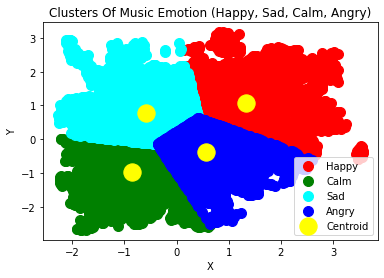

In [130]:

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(x)  
y_predict= kmeans.fit_predict(x)


#for first cluster  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'red', label = 'Happy')

#for second cluster 
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Calm')

# for third cluster
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'cyan', label = 'Sad')

#for 4th cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'blue', label = 'Angry')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')

plt.title('Clusters Of Music Emotion (Happy, Sad, Calm, Angry)')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend() 
plt.show()


# Checking Cluster Centers and Labels

In [131]:
kmeans.cluster_centers_

array([[ 1.32691453,  1.05768064],
       [-0.8512787 , -0.96750991],
       [-0.57673038,  0.78344302],
       [ 0.55974178, -0.36816414]])

In [132]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

# Converting into pandas data structure

In [133]:
# Converting into pandas data structure

df_target = pd.DataFrame(kmeans.labels_)
df_target.head()

,0
0,3
1,3
2,3
3,3
4,3


In [134]:
dfe = df.copy()

In [135]:
dfe.shape

(36434, 262)

In [136]:
dfe['target'] = df_target

In [137]:
dfe.shape

(36434, 263)

In [138]:
dfe.head()

,musicId,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,...,pcm_fftMag_mfcc_sma_de[6]_std,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target
0,1,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,...,4.275177,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3
1,1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,...,3.798621,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3
2,1,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,...,3.006370,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3
3,1,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,...,2.623482,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3
4,1,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,...,2.096191,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3


# Checking the number of targets counts

In [139]:

dfe['target'].value_counts()

1    10601
3    10193
2     9143
0     6497
Name: target, dtype: int64

# Adding Target names to the pandas dataframe

In [140]:
dfe['target_name'] = df_target
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Happy' if x == 1 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Sad' if x == 3 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Calm' if x == 2 else x)
dfe['target_name'] = dfe['target_name'].apply(lambda x : 'Angry' if x == 0 else x)

dfe.shape

(36434, 264)

In [141]:
dfe['target_name'].value_counts()

Happy    10601
Sad      10193
Calm      9143
Angry     6497
Name: target_name, dtype: int64

In [142]:
dfe = dfe.drop('musicId', axis = 1)
dfe.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Splitting data into Features and Targets

In [143]:
X = dfe.drop(['target','target_name'], axis = 1).values
y = dfe['target'].values

# Splitting the data into train set and test set 

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape)
print(" ")
print(y_train.shape)

(29147, 261)
 
(29147,)


# Preprocessing the Data (Scalling)

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Outputing using the Random Forest Algorithm 

In [146]:
# USING RANDOM FOREST CLASSIFIER

model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.5843282557979964
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.31      0.44      1342
           1       0.55      0.74      0.63      2105
           2       0.62      0.55      0.58      1794
           3       0.56      0.63      0.60      2046

    accuracy                           0.58      7287
   macro avg       0.62      0.56      0.56      7287
weighted avg       0.61      0.58      0.57      7287

CONFUSION MATRIX
[[ 418  399  194  331]
 [  30 1561  178  336]
 [  37  439  986  332]
 [  66  457  230 1293]]
 
TIME EXHAUSTED
Training Time: 218.01543378829956 secs
Prediction Time: 1.0885896682739258 secs
Total Time: 219.1040234565735 secs


# Training and Outputing using the Support Vector Algorithm

In [147]:
# USING SUPPORT VECTOR MACHINE

model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.3691505420612049
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.52      0.05      0.09      1342
           1       0.36      0.58      0.44      2105
           2       0.37      0.29      0.33      1794
           3       0.37      0.43      0.40      2046

    accuracy                           0.37      7287
   macro avg       0.41      0.34      0.32      7287
weighted avg       0.40      0.37      0.34      7287

CONFUSION MATRIX
[[  70  572  269  431]
 [  19 1217  312  557]
 [  21  745  529  499]
 [  24  834  314  874]]
 
TIME EXHAUSTED
Training Time: 395.09284472465515 secs
Prediction Time: 73.54552125930786 secs
Total Time: 468.638365983963 secs


# Training and Outputing using the Naive Bayes Algorithm

In [148]:
# USING NAIVE BAYES

model = GaussianNB()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.27638259914916974
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.22      0.05      0.08      1342
           1       0.38      0.04      0.07      2105
           2       0.27      0.61      0.37      1794
           3       0.29      0.38      0.33      2046

    accuracy                           0.28      7287
   macro avg       0.29      0.27      0.21      7287
weighted avg       0.30      0.28      0.22      7287

CONFUSION MATRIX
[[  68   34  701  539]
 [  78   78 1191  758]
 [  65   38 1092  599]
 [  93   57 1120  776]]
 
TIME EXHAUSTED
Training Time: 0.17999577522277832 secs
Prediction Time: 0.06532621383666992 secs
Total Time: 0.24532198905944824 secs


# Training and Outputing using the Decision Tree Algorithm

In [149]:
# USING DECISION TREE

model = DecisionTreeClassifier()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.39494991080005487
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.36      0.34      0.35      1342
           1       0.43      0.44      0.43      2105
           2       0.37      0.39      0.38      1794
           3       0.40      0.39      0.40      2046

    accuracy                           0.39      7287
   macro avg       0.39      0.39      0.39      7287
weighted avg       0.39      0.39      0.39      7287

CONFUSION MATRIX
[[462 280 288 312]
 [270 917 441 477]
 [236 450 693 415]
 [328 480 432 806]]
 
TIME EXHAUSTED
Training Time: 13.558697938919067 secs
prediction Time: 0.009307146072387695 secs
Total Time: 13.568005084991455 secs


# STARTING MULTI-CLASSIFICATION

#   <! -Happy Or Others -> (First Level Classification)

In [150]:
df_happy = dfe.copy()
df_happy.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Converting features to the first level classification for Happy

In [151]:
df_happy['target'] = df_happy['target'].apply(lambda x : 1 if x == 1 else 0)
df_happy['target_name'] = df_happy['target_name'].apply(lambda x : 'Happy' if x == 'Happy' else 'Others')
print(df_happy['target'].value_counts())
print(df_happy['target_name'].value_counts())

0    25833
1    10601
Name: target, dtype: int64
Others    25833
Happy     10601
Name: target_name, dtype: int64


In [152]:
df_happy.shape

(36434, 263)

In [153]:
df_happy.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,0,Others
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,0,Others
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,0,Others
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,0,Others
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,0,Others


# Separating the features from targets and spliting the data into train and test set

In [154]:
df_happy.groupby('target').size()

target
0    25833
1    10601
dtype: int64

In [155]:
X = df_happy.drop(['target','target_name'], axis = 1).values
y = df_happy['target'].values

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape)
print(" ")
print(y_train.shape)

(29147, 261)
 
(29147,)


# Preprocessing the new data by scalling

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Outputing the first level classification using Random Forest

In [182]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7544757033248082
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1316
           2       0.72      0.93      0.81      1812

    accuracy                           0.75      3128
   macro avg       0.78      0.72      0.73      3128
weighted avg       0.77      0.75      0.74      3128

CONFUSION MATRIX
[[ 671  645]
 [ 123 1689]]
 
TIME EXHAUSTED
Training Time: 114.57227396965027 secs
Prediction Time: 0.4191863536834717 secs
Total Time: 114.99146032333374 secs


# Training and Outputing the first level classification using SVM

In [159]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7111294085357486
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5182
           1       0.00      0.00      0.00      2105

    accuracy                           0.71      7287
   macro avg       0.36      0.50      0.42      7287
weighted avg       0.51      0.71      0.59      7287

CONFUSION MATRIX
[[5182    0]
 [2105    0]]
 
TIME EXHAUSTED
Training Time: 253.51256680488586 secs
Prediction Time: 46.267014265060425 secs
Total Time: 299.7795810699463 secs


/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/efissy/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <! -Sad Or Others -> (Second Level Classification)

In [160]:
# COPYING THE DATA 
df_sad = dfe.copy()
df_sad.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Removing Happy from the classes

In [161]:
df_sad = df_sad[(df_sad['target'] == 0) | (df_sad['target'] == 2) | (df_sad['target'] == 3)]
df_sad.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


In [162]:
# printing shape of the new data 
df_sad.shape

(25833, 263)

In [163]:
#printing the classes and there counts
print(df_sad['target'].value_counts())
print(df_sad['target_name'].value_counts())

3    10193
2     9143
0     6497
Name: target, dtype: int64
Sad      10193
Calm      9143
Angry     6497
Name: target_name, dtype: int64


In [164]:
df_sad['target'] = df_sad['target'].apply(lambda x : 3 if x == 3 else 0)
df_sad['target_name'] = df_sad['target_name'].apply(lambda x : 'Sad' if x == 'Sad' else 'Others')
print(df_sad['target'].value_counts())
print(df_sad['target_name'].value_counts())

0    15640
3    10193
Name: target, dtype: int64
Others    15640
Sad       10193
Name: target_name, dtype: int64


In [165]:
# checking the head of the new data
df_sad.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


In [166]:
# printing the data ordered by target
df_sad.groupby('target').size()

target
0    15640
3    10193
dtype: int64

# Separating the features from targets and spliting the data into train and test set

In [167]:
X = df_sad.drop(['target','target_name'], axis = 1).values
y = df_sad['target'].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape)
print(" ")
print(y_train.shape)

(20666, 261)
 
(20666,)


# Preprocessing the new data by scalling

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Outputing the second level classification using Random Forest

In [170]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.7160828333655893
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      3149
           3       0.86      0.33      0.47      2018

    accuracy                           0.72      5167
   macro avg       0.78      0.65      0.64      5167
weighted avg       0.76      0.72      0.68      5167

CONFUSION MATRIX
[[3042  107]
 [1360  658]]
 
TIME EXHAUSTED
Training Time: 153.00894117355347 secs
Prediction Time: 0.6561999320983887 secs
Total Time: 153.66514110565186 secs


# Training and Outputing the second level classification using SVM

In [171]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.612154054577124
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      3149
           3       0.94      0.01      0.01      2018

    accuracy                           0.61      5167
   macro avg       0.77      0.50      0.39      5167
weighted avg       0.74      0.61      0.47      5167

CONFUSION MATRIX
[[3148    1]
 [2003   15]]
 
TIME EXHAUSTED
Training Time: 109.50853300094604 secs
Prediction Time: 29.983242988586426 secs
Total Time: 139.49177598953247 secs


# <! -Calm and Angry -> (Third Level Classification)

In [172]:
# COPYING THE DATA 
df_calm = dfe.copy()
df_calm.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
0,1.0,76.236881,0.638026,0.020757,0.011331,0.068340,-54.281564,1.292853,2.338173,0.039711,...,3.789311,3.723886,3.774478,3.355107,2.721561,2.740582,2.624290,2.393544,3,Sad
1,1.5,71.114166,0.651490,0.022743,0.012805,0.064180,-54.139708,2.033337,1.296564,0.101967,...,3.492122,3.728833,3.589920,3.369886,3.106179,3.151317,3.092087,2.256661,3,Sad
2,2.0,72.168291,0.638354,0.029875,0.023646,0.088494,-53.023884,2.325085,1.172321,0.144583,...,3.976502,2.565674,3.823896,3.310618,3.664141,3.453685,3.261241,2.129483,3,Sad
3,2.5,106.613114,0.665557,0.048616,0.035622,0.120874,-29.871383,2.467286,1.112019,0.154894,...,3.435108,2.287634,3.231318,2.730121,3.354633,3.000868,3.051096,2.126041,3,Sad
4,3.0,87.619460,0.678091,0.082604,0.077627,0.224842,-15.041547,2.186683,1.061730,0.158426,...,2.209859,2.066590,2.406035,2.301105,2.448193,1.810195,1.758662,1.599982,3,Sad


# Removing Happy and Sad from the classes

In [173]:
df_calm = df_calm[(df_calm['target'] == 0) | (df_calm['target'] == 2)]
df_calm.head()

,frameTime,F0final_sma_mean,voicingFinalUnclipped_sma_mean,jitterLocal_sma_mean,jitterDDP_sma_mean,shimmerLocal_sma_mean,logHNR_sma_mean,audspec_lengthL1norm_sma_mean,audspecRasta_lengthL1norm_sma_mean,pcm_RMSenergy_sma_mean,...,pcm_fftMag_mfcc_sma_de[7]_std,pcm_fftMag_mfcc_sma_de[8]_std,pcm_fftMag_mfcc_sma_de[9]_std,pcm_fftMag_mfcc_sma_de[10]_std,pcm_fftMag_mfcc_sma_de[11]_std,pcm_fftMag_mfcc_sma_de[12]_std,pcm_fftMag_mfcc_sma_de[13]_std,pcm_fftMag_mfcc_sma_de[14]_std,target,target_name
60,31.0,115.209230,0.717087,0.052097,0.045805,0.112069,-32.675300,3.633601,1.066619,0.201780,...,3.130656,2.502629,3.177728,3.064014,2.748985,2.501069,1.959697,2.138451,0,Angry
61,31.5,124.812017,0.699042,0.049973,0.037940,0.095225,-30.481664,3.181359,1.057794,0.216741,...,2.603286,2.260718,2.410804,2.405140,2.523338,2.443689,2.042546,1.711249,0,Angry
62,32.0,197.575078,0.756373,0.093180,0.062667,0.156608,-3.946297,2.837410,1.026339,0.139646,...,2.283874,2.396251,1.937284,1.860706,1.791478,2.210782,2.125275,1.403981,0,Angry
63,1.0,210.278873,0.811468,0.049876,0.049844,0.192451,5.495795,0.782092,5.885590,0.032527,...,2.526903,3.759107,4.135306,2.679546,2.337604,2.368889,2.556786,2.283617,0,Angry
64,1.5,192.163727,0.842691,0.034356,0.033937,0.172943,9.647759,1.550055,1.588174,0.069352,...,2.767587,2.766136,3.790424,2.960274,2.795310,2.657158,3.047888,2.095823,0,Angry


In [174]:
# print the dimension of the new data
df_calm.shape

(15640, 263)

In [175]:
#printing the classes and there counts
print(df_calm['target'].value_counts())
print(df_calm['target_name'].value_counts())

2    9143
0    6497
Name: target, dtype: int64
Calm     9143
Angry    6497
Name: target_name, dtype: int64


In [176]:
# printing the data ordered by target
df_calm.groupby('target').size()

target
0    6497
2    9143
dtype: int64

# Separating the features from targets and spliting the data into train and test set

In [177]:
# separating features from targets
X = df_calm.drop(['target','target_name'], axis = 1).values
y = df_calm['target'].values

In [178]:
# splitting the new data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print(X_train.shape)
print(" ")
print(y_train.shape)

(12512, 261)
 
(12512,)


# Preprocessing the new data by scalling the data 

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training and Outputing the third level classification using Random Forest

In [180]:
# USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_estimators = 400)

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.754156010230179
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.51      0.63      1316
           2       0.72      0.93      0.81      1812

    accuracy                           0.75      3128
   macro avg       0.79      0.72      0.72      3128
weighted avg       0.78      0.75      0.74      3128

CONFUSION MATRIX
[[ 667  649]
 [ 120 1692]]
 
TIME EXHAUSTED
Training Time: 75.44669389724731 secs
Prediction Time: 0.382479190826416 secs
Total Time: 75.82917308807373 secs


# Training and Outputing the third level classification using SVM

In [181]:
# USING SUPPORT VECTOR MACHINE
model = SVC()

t0 = time()
model.fit(X_train, y_train)
train_time = time() - t0

t1 = time()
predictions = model.predict(X_test)
prediction_time = time() - t1

print("ACCURACY SCORE")
print(accuracy_score(y_test, predictions))
print(" ")

print("CLASSIFICATION REPORT")
print(classification_report(y_test, predictions))

print("CONFUSION MATRIX")
print(confusion_matrix(y_test, predictions))

print(" ")
print("TIME EXHAUSTED")
print("Training Time: " + str(train_time) + " secs")
print("Prediction Time: " + str(prediction_time) + " secs")
print("Total Time: " + str(prediction_time + train_time) + " secs")

ACCURACY SCORE
0.6195652173913043
 
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.75      0.14      0.24      1316
           2       0.61      0.97      0.75      1812

    accuracy                           0.62      3128
   macro avg       0.68      0.55      0.49      3128
weighted avg       0.67      0.62      0.53      3128

CONFUSION MATRIX
[[ 187 1129]
 [  61 1751]]
 
TIME EXHAUSTED
Training Time: 43.804880142211914 secs
Prediction Time: 11.331532001495361 secs
Total Time: 55.136412143707275 secs


# Final mean accuracy score of the multiclassification model

In [183]:
#  Mean Accuracy For Random Forest Algorithm
Random_forest_accuracies = np. array([0.7544757033248082, 0.7160828333655893, 0.754156010230179])
print("Random Forest Mean Accuracy Score", np.mean(Random_forest_accuracies))

print(" ")

#  Mean Accuracy For Support vector machine (svm) 
Support_vector_accuracies = np. array([0.7111294085357486, 0.612154054577124, 0.6195652173913043])
print("Support Vector Machine Mean Accuracy Score", np.mean(Support_vector_accuracies))

Random Forest Mean Accuracy Score 0.7415715156401922
 
Support Vector Machine Mean Accuracy Score 0.6476162268347255
